# "ULTRA LONG GAMMA-RAY BURSTS FROM THE COLLAPSE OF BLUE SUPER GIANT STARS: AN END-TO-END SIMULATION"
## Rosalba Perna, Davide Lazzati, Matteo Cantiello


  Ultra-long gamma ray bursts (ULGRBs) are a distinct class of GRBs
  characterized by durations of several thousands of seconds, about
  two orders of magnitude longer than those of standard long GRBs
  (LGRBs). The driving engine of these events has not been uncovered
  yet, and ideas range from magnetars, to tidal disruption events, to
  extended massive stars, such as blue super giants (BSG). BSGs, a
  possible endpoint of stellar evolution, are attractive for the
  relatively long free-fall times of their envelopes, allowing
  accretion to power a long-lasting central engine. At the same time,
  their large radial extension poses a challenge to the emergence of a
  jet.  Here we perform an end-to-end simulation aimed at assessing
  the viability of BSGs as ULGRB progenitors.  
  The evolution to core collapse of a BSG star model is calculated
  with the MESA code. We then compute the accretion rate for
  the fraction of envelope material with enough angular momentum to
  circularize and form an accretion disk, and input the corresponding
  power into a jet which we evolve through the star envelope with the
  FLASH code.  Our simulation shows that the jet can emerge, and the
  resulting light curves resemble those observed in ULGRBs, with
  durations $T_{90}$ ranging from $\approx\,4000$~s to $\approx\,10^4$~s
  depending on the viewing angle.
  
  

In [1]:
%matplotlib inline
from Constants import Constants
import mesa_reader as mr
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import loadtxt
c=Constants()

Constants defined...


In [2]:
# Define some useful functions
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;
def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

In [3]:
# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

# Set some global plot options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16


In [4]:
# Data folders, Laptop or Work 
DATA='/Users/mcantiello/Dropbox (Personal)/work/rosalba/'                    
DATA='/Users/mcantiello/Dropbox-personal/Dropbox (Personal)/work/rosalba/'

In [5]:
# Model locations and names
MODS=['40D06','30D055','30B00']
names=[r' $40 {\rm M}_\odot  \; \Omega/\Omega_k$=$0.60 \ {\rm Z}$=$10^{-5}$', r' $30 {\rm M}_\odot  \; \Omega/\Omega_k$=$0.55 \ {\rm Z}$=$10^{-5}$',r' $30 {\rm M}_\odot  \; \Omega/\Omega_k$=$0.00 \ {\rm Z}$=$0.002$'] 


# HR-Diagrams

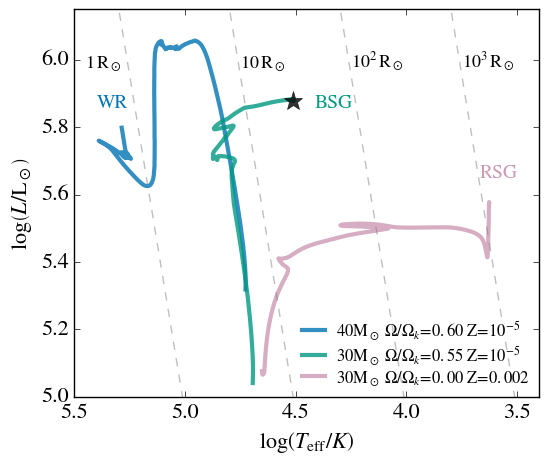

In [6]:
tt=np.arange(3,5,0.01)
ii=0
color=[BLUE,BLUE_GREEN,RED_PURPLE,VERMILLION,ORANGE,YELLOW]
for models in MODS:
    chosen_model=DATA+models+'/LOGS/'
    h = mr.MesaData(chosen_model+'history.data')
    h1=h.center_h1
    logl=h.log_L
    logt=h.log_Teff
    loglh=h.log_LH
    model = h.model_number
    tams=find_h1(h1,model,0.1)
    plt.plot(logt,logl,linestyle='-',linewidth=3,alpha=0.8,label=names[ii],color=color[ii])
    ii=ii+1
legend = plt.legend(loc='lower right',prop={'size':12})
tt2=np.arange(4.5,5.5,0.1)
plt.plot(tt2,np.log10(const_radius_on_hrd(10**tt2,1*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,10*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,100*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,1000*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)

h = mr.MesaData(DATA+'30D055'+'/LOGS/'+'history.data')
h1=h.center_h1
logl=h.log_L
logt=h.log_Teff
plt.plot(logt[-1],logl[-1],marker='*',color=BLACK,alpha=0.8,markersize=14)
plt.axis([5.5,3.4, 5, 6.15])
plt.xlabel(r'$\log \left( T_{\rm eff} / K \right)$')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
plt.annotate(r"$1 \,\rm{R}_\odot$",(5.45,5.98),size=13)
plt.annotate(r"$10 \,\rm{R}_\odot$",(4.75,5.98),size=13)
plt.annotate(r"$10^2 \,\rm{R}_\odot$",(4.25,5.98),size=13)
plt.annotate(r"$10^3 \,\rm{R}_\odot$",(3.75,5.98),size=13)
plt.annotate(r"RSG",(3.67,5.65),size=14,color=RED_PURPLE)
plt.annotate(r"BSG",(4.415,5.86),size=14,color=BLUE_GREEN)
plt.annotate(r"WR",(5.4,5.86),size=14,color=BLUE)
FILENAME = "BSG.pdf"
plt.savefig(FILENAME)
    

## Specific Angular Momentum Distribution at Core Collapse

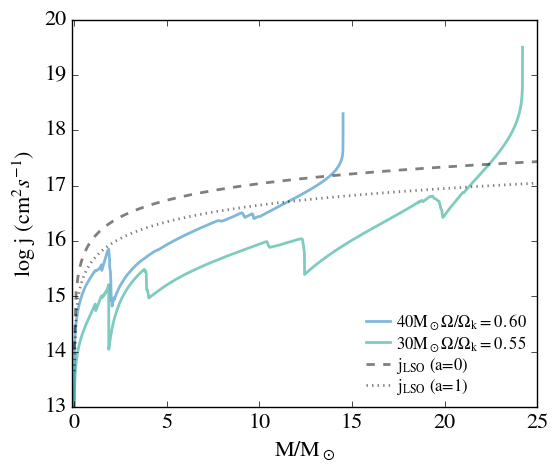

In [7]:
MODS=['40D06','30D055'] 
names=[r'$40 \rm{M}_\odot \Omega/\Omega_k = 0.60$', r'$30 \rm{M}_\odot \Omega/\Omega_k = 0.55$', r'$30 \rm{M}_\odot \Omega/\Omega_k = 0.50$',r'$30 \rm{M}_\odot \Omega/\Omega_k = 0.20$']#'40D05,'30D055','30D055 B=0 after MS','30D055 ST=0.01 after MS','30D055 ST=0.01','30D055 ST=0.1','30D055 ST=0.5']#,'30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
alpha=[0.8,0.8,0.8,0.8]
color=[BLUE,BLUE_GREEN]

p = mr.MesaData(DATA+'30D055_reduced_ST_after_coreH/LOGS/cc.data')
rho=10**p.logRho
kappa=p.opacity
radius=p.radius
t=p.temperature
jj=p.log_j_rot
m=p.mass

ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    jj=p.log_j_rot
    m=p.mass
    plt.plot(m,jj,linestyle='-',linewidth=2,alpha=0.5,label=names[ii],color=color[ii])
    ii=ii+1

m=np.arange(0.01,50,0.1)   
jlso=np.log10(((6.0)**0.5)*c.G*m*c.msun/c.c)
jlsok=np.log10(c.G*m*c.msun/c.c)

plt.plot(m,jlso,linestyle='--',linewidth=2,alpha=0.5,color=BLACK,label=r'j$_{\rm LSO}$ (a=0)')
plt.plot(m,jlsok,linestyle=':',linewidth=2,alpha=0.5,color=BLACK,label=r'j$_{\rm LSO}$ (a=1)')    
legend = plt.legend(loc='lower right',prop={'size':12})

plt.axis([-0.1,25, 13,20])    
plt.xlabel(r'M/M$_\odot$')
plt.ylabel(r'$\log$ j (cm$^2 s^{-1}$)')

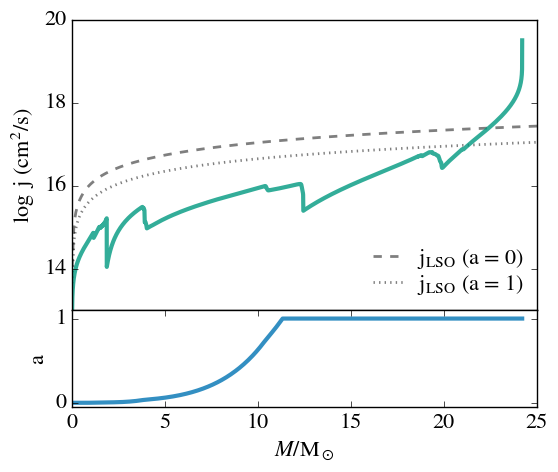

In [8]:
import matplotlib.gridspec as gridspec
# Create grid with two rows and one column. Height ratio 3/1
gs1 = gridspec.GridSpec(2, 1,height_ratios=[3,1])
# No space between plots, e.g.: gs1.update(left=0.1, right=0.9, wspace=0.00,hspace=0.00)
gs1.update(wspace=0.00,hspace=0.00)
# Assign axis and remove xticks from top plot
ax1 = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[1,0])
ax1.set_xticks([])
xlims=[0,25]

## Top Plot (Specific angular momentum content in cc model)
p = mr.MesaData(DATA+'/30D055_RERUN/LOGS/cc.data')
jj=p.log_j_rot
m=p.mass
mm=np.arange(0.01,50,0.1) 
jlso=np.log10(((6.0)**0.5)*c.G*mm*c.msun/c.c)
jlsok=np.log10(c.G*mm*c.msun/c.c)
ax1.plot(mm,jlso,linestyle='--',linewidth=2,alpha=0.5,color=BLACK,label=r' j$_{ \rm LSO}$ (a = 0)')
ax1.plot(mm,jlsok,linestyle=':',linewidth=2,alpha=0.5,color=BLACK,label=r' j$_{ \rm LSO}$ (a = 1)')   
ax1.plot(m,jj,linestyle='-',linewidth=3,alpha=0.8,color=color[1])
legend = ax1.legend(loc='lower right',prop={'size':16})
ax1.set_ylim([13,20])
ax1.set_xlim(xlims)

## Bottome Plot (Kerr parameter)
Jtot=10**p.log_J_inside
a=c.G*Jtot*m/c.msun/c.c
ax2.plot(m,np.minimum(a,1.0),linestyle='-',linewidth=3,alpha=0.8,color=color[0])
plt.axis([-0.1,30, -0.1,1.1])
ax2.set_ylim([-0.05,1.1])
ax2.set_xlim(xlims)

ax1.set_ylabel(r'$\log \,$ j (cm$^2$/s)')
ax2.set_ylabel('a')
ax2.set_xlabel(r'$M/{\rm M}_\odot$')
ax2.yaxis.set_ticks([0,1])
ax1.yaxis.set_ticks([14,16,18,20])

FILENAME = "JLSO.pdf"
plt.savefig(FILENAME)


## Determine regions with J > Jlso (a=1)

In [9]:
ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    jj=p.log_j_rot
    m=p.mass
    lsok=np.log10(c.G*m*c.msun/c.c)
    k = 0
    while jj[k]>lsok[k]:
        k += 1
    print(k)

1176
1089


## Free Fall Timescale 

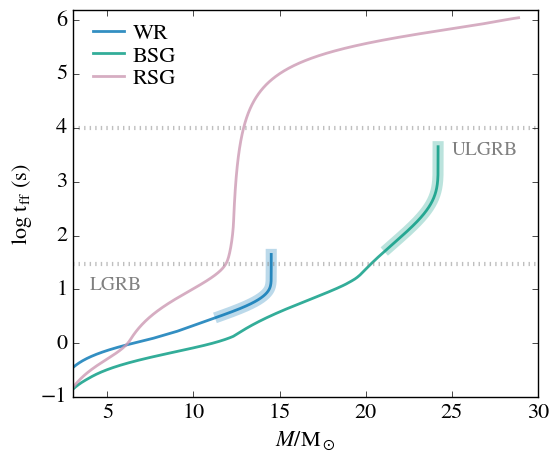

In [10]:
MODS=['40D06','30D055','30B00']
names=[r'$40 \rm{M}_\odot  \; \Omega/\Omega_k$=$0.60 \ {\rm Z}$=$10^{-5}$', r'$30 \rm{M}_\odot  \; \Omega/\Omega_k$=$0.55 \ {\rm Z}$=$10^{-5}$',r'$30 \rm{M}_\odot  \; \Omega/\Omega_k$=$0.00 \ {\rm Z}$=$0.002$']
names=[r'WR',r'BSG',r'RSG']

alpha=[0.8,0.8,0.8,0.8]
color=[BLUE,BLUE_GREEN,RED_PURPLE,ORANGE]

ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    m=p.mass
    jj=p.log_j_rot
    t_ff=p.t_ff
    # Find index where j>jlso
    lsok=np.log10(c.G*m*c.msun/c.c)
    k = 0
    while jj[k]>lsok[k]:
        k += 1
    # Plot result
    plt.plot(m[:k],t_ff[:k],linestyle='-',linewidth=8,alpha=alpha[ii]/3,color=color[ii])
    plt.plot(m,t_ff,linestyle='-',linewidth=2,alpha=alpha[ii],label=names[ii],color=color[ii])
    ii=ii+1

plt.axhline(y=1.477, linewidth=3, color='gray',linestyle=':',alpha=0.5)
plt.axhline(y=4, linewidth=3, color='gray',linestyle=':',alpha=0.5)

plt.annotate(r"ULGRB",(25,3.5),size=14,color='gray')
plt.annotate(r"LGRB",(4,1.0) ,size=14,color='gray')

legend = plt.legend(loc='upper left',prop={'size':16})  
plt.axis([3,30, -1,6.2])    
plt.xlabel(r'$M/{\rm M}_\odot$')
plt.ylabel(r'$\log$ t$_{\rm ff}$ (s)')
FILENAME = "TFF.pdf"
plt.savefig(FILENAME)

# Redo Rosalba's plots (J, Mdot and a-bh)
## Mdot as function of Time

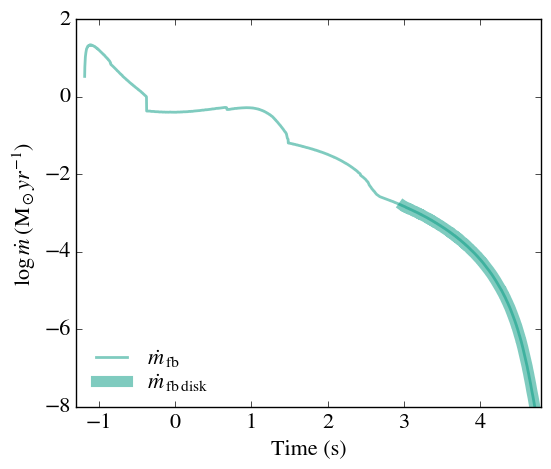

In [11]:
# Read first and second columns (t,mdot). Plot log t, vs log mm=lg(mdot+1.e-8)
DATA='data/mdot25.dat'
dat = pandas.read_csv(DATA,delim_whitespace=True,names = ['Time', 'Mdot', 'A', 'Mdot2', 'C'])
plt.plot(np.log10(dat["Time"]),np.log10(dat['Mdot']),linewidth=2,alpha=0.5,color=BLUE_GREEN,label=r'  $\dot{m}_{\rm \, fb}$')
min=np.where(dat['Mdot2']>0)
m=np.min(min)
plt.plot(np.log10(dat["Time"][m:]),np.log10(dat['Mdot'][m:]),linewidth=8,alpha=0.5,color=BLUE_GREEN,label=r'  $\dot{m}_{\rm \, fb \, disk}$')

legend = plt.legend(loc='lower left',prop={'size':16})
plt.xlabel(r'Time (s)')
plt.ylabel(r'$\log \,\dot{m} \; ({\rm M}_\odot yr^{-1}$)')
plt.axis([-1.29,4.8, -8,2]) 
FILENAME = "MDOT.pdf"
plt.savefig(FILENAME)

# Simulation Snapshot

yt : [WARNING  ] 2018-03-12 14:30:10,788 Guessing dimensionality as 2
yt : [WARNING  ] 2018-03-12 14:30:10,788 Extending theta dimension to 2PI + left edge.
yt : [WARNING  ] 2018-03-12 14:30:10,789 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2018-03-12 14:30:10,789 Overriding length_unit: 1e+09 cm.
yt : [INFO     ] 2018-03-12 14:30:10,790 Overriding mass_unit: 1e+27 g.
yt : [INFO     ] 2018-03-12 14:30:10,801 Parameters: current_time              = 12000.0
yt : [INFO     ] 2018-03-12 14:30:10,801 Parameters: domain_dimensions         = [160 160   1]
yt : [INFO     ] 2018-03-12 14:30:10,802 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-03-12 14:30:10,803 Parameters: domain_right_edge         = [ 4000.          4000.             6.28318531]
yt : [INFO     ] 2018-03-12 14:30:10,803 Parameters: cosmological_simulation   = 0.0


Unit name:      code_density   
CGS conversion: 1.0            
Dimensions:     (mass)/(length)**3

Unit name:      code_time      
CGS conversion: 1.0            
Dimensions:     (time)         

Unit name:      code_length    
CGS conversion: 1000000000.0   
Dimensions:     (length)       

Unit name:      code_temperature
CGS conversion: 1.0            
Dimensions:     (temperature)  

Unit name:      code_mass      
CGS conversion: 1e+27          
Dimensions:     (mass)         

Unit name:      code_metallicity
CGS conversion: 1.0            
Dimensions:     1              

Unit name:      code_magnetic  
CGS conversion: 3.5449077018110318
Dimensions:     sqrt((mass))/(sqrt((length))*(time))

Unit name:      code_pressure  
CGS conversion: 1e+18          
Dimensions:     (mass)/((length)*(time)**2)

Unit name:      code_velocity  
CGS conversion: 1.0            
Dimensions:     (length)/(time)

Unit name:      code_specific_energy
CGS conversion: 1.0            
Dimensions:     (

yt : [INFO     ] 2018-03-12 14:30:15,288 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2018-03-12 14:30:21,073 xlim = 0.000000 4000.000000
yt : [INFO     ] 2018-03-12 14:30:21,074 ylim = 0.000000 4000.000000
yt : [INFO     ] 2018-03-12 14:30:21,075 xlim = 0.000000 4000.000000
yt : [INFO     ] 2018-03-12 14:30:21,076 ylim = 0.000000 4000.000000
yt : [INFO     ] 2018-03-12 14:30:21,077 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



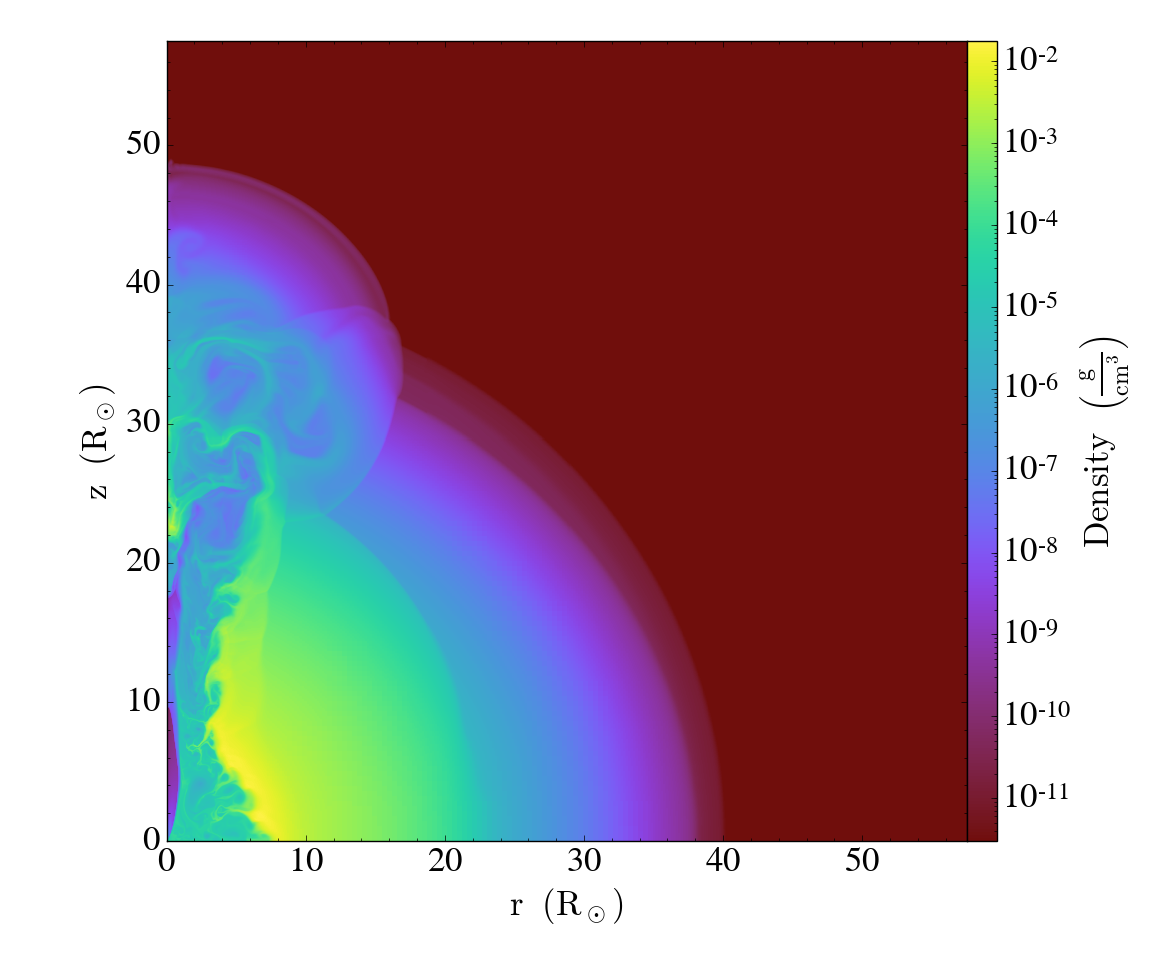

yt : [INFO     ] 2018-03-12 14:30:25,559 Saving plot ultralong.png
yt : [INFO     ] 2018-03-12 14:30:26,372 Saving plot ultralong_dusk.png
yt : [INFO     ] 2018-03-12 14:30:27,002 Saving plot ultralong_hot.png
yt : [INFO     ] 2018-03-12 14:30:27,609 Saving plot ultralong_rdbu.png
yt : [INFO     ] 2018-03-12 14:30:28,061 Saving plot ultralong_rdbu.pdf
yt : [INFO     ] 2018-03-12 14:30:28,919 Saving plot ultralong_pubu.png
yt : [INFO     ] 2018-03-12 14:30:29,574 Saving plot ultralong_pubugn.png


['ultralong_pubugn.png']

In [12]:
filename = 'data/sims/ultralong_GRBhdf5_plt_cnt_0400'
import yt

units_override = {"length_unit": (1.0e9, "cm") # Note that if we change L, we also need to change density scale (~L^3)
                  ,"mass_unit": (1.0e27, "g")} # Therefore, to fix density scale, we need to multiply by L^3
                                                
ds = yt.load(filename,units_override=units_override)

# Show units
reg = ds.unit_registry
for un in reg.keys():
    if un.startswith('code_'):
        fmt_tup = (un, reg.lut[un][0], str(reg.lut[un][1]))
        print ("Unit name:      {:<15}\nCGS conversion: {:<15}\nDimensions:     {:<15}\n".format(*fmt_tup))

# Print more info
ds.print_stats()
ds.field_list
ds.derived_field_list
print (ds.domain_width.in_units("cm"))
ds.domain_width

# Create the slice plot

#p = yt.ProjectionPlot(ds,"theta", "density") # ,width=(20, 'kpc')  # This is doing a projection
p=yt.SlicePlot(ds,"theta", "density",origin="native")
font_dict = {'family':'STIXGeneral','size':25}
p.set_font(font_dict)


#p.annotate_scale() # This does not work in cylindric coordinates

p.show()

p.save('ultralong.png')

p.set_cmap(field="density", cmap='dusk')
p.save('ultralong_dusk.png')

p.set_cmap(field="density", cmap='hot')
p.save('ultralong_hot.png')

p.set_cmap(field="density", cmap='RdBu_r')
p.save('ultralong_rdbu.png')
p.save('ultralong_rdbu.pdf')

p.set_cmap(field="density", cmap='PuBu')
p.save('ultralong_pubu.png')

p.set_cmap(field="density", cmap='PuBuGn')
p.save('ultralong_pubugn.png')




## Lightcurves

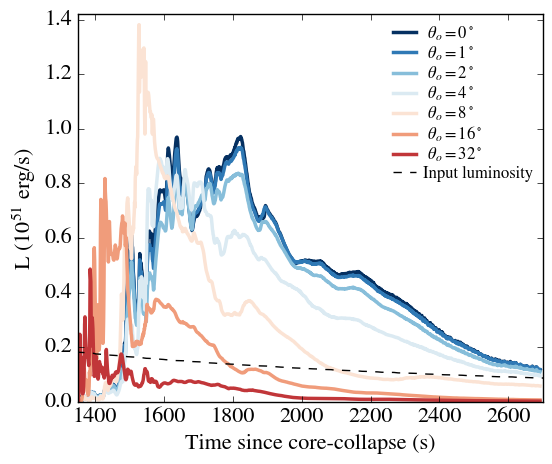

In [13]:
import numpy as n
import pylab as p

cmap = plt.cm.Spectral
cmap = plt.cm.RdBu_r
# Line colors
nlines = 8
# Use 0-1 values to generate the colors with the linspace method
line_colors = cmap(np.linspace(0,1,nlines))
COLORS=[BLUE_GREEN,SKY_BLUE,'darkseagreen','sienna','orchid','tomato','slategray',BLACK]

lw=2.5
alpha=1.0

t0,l0,T0=n.loadtxt('data/sims/lcurve_thetao=0.dat',unpack=True)
t1,l1,T1=n.loadtxt('data/sims/lcurve_thetao=1.dat',unpack=True)
t2,l2,T2=n.loadtxt('data/sims/lcurve_thetao=2.dat',unpack=True)
t4,l4,T4=n.loadtxt('data/sims/lcurve_thetao=4.dat',unpack=True)
t8,l8,T8=n.loadtxt('data/sims/lcurve_thetao=8.dat',unpack=True)
t16,l16,T16=n.loadtxt('data/sims/lcurve_thetao=16.dat',unpack=True)
t32,l32,T32=n.loadtxt('data/sims/lcurve_thetao=32.dat',unpack=True)

tm,mdot,dum,mdot2,dum=n.loadtxt('data/sims/mdot25.dat',unpack=True)

liso=2e33*mdot*3e10**2*.01/(1-n.cos(16*n.pi/180+1./5.))
liso2=2e33*mdot2*3e10**2*.01/(1-n.cos(16*n.pi/180+1./5.))


plt.figure()
plt.plot(t0+989,l0/2.e51,label=r' $\theta_o=0^\circ$',lw=lw,color=line_colors[0],alpha=alpha)
plt.plot(t1+989,l1/2.e51,label=r' $\theta_o=1^\circ$',lw=lw,color=line_colors[1],alpha=alpha)
plt.plot(t2+989,l2/2.e51,label=r' $\theta_o=2^\circ$',lw=lw,color=line_colors[2],alpha=alpha)
plt.plot(t4+989,l4/2.e51,label=r' $\theta_o=4^\circ$',lw=lw,color=line_colors[3],alpha=alpha)
plt.plot(t8+989,l8/2.e51,label=r' $\theta_o=8^\circ$',lw=lw,color=line_colors[4],alpha=alpha)
plt.plot(t16+989,l16/2.e51,label=r' $\theta_o=16^\circ$',lw=lw,color=line_colors[5],alpha=alpha)
plt.plot(t32+989,l32/2.e51,label=r' $\theta_o=32^\circ$',lw=lw,color=line_colors[6],alpha=alpha)
plt.plot(tm,liso2/1e51,'k--',label='Input luminosity',color=BLACK)
plt.axis([800,3000,0,1.55])
legend = p.legend(loc='upper right',prop={'size':12})
plt.xlabel('Time since core-collapse (s)')
plt.ylabel(r'L ($10^{51}$ erg/s)')
plt.axis([1350,2700,0,1.42]) 
plt.savefig('LC.pdf')

# T$_{90}$ Plot

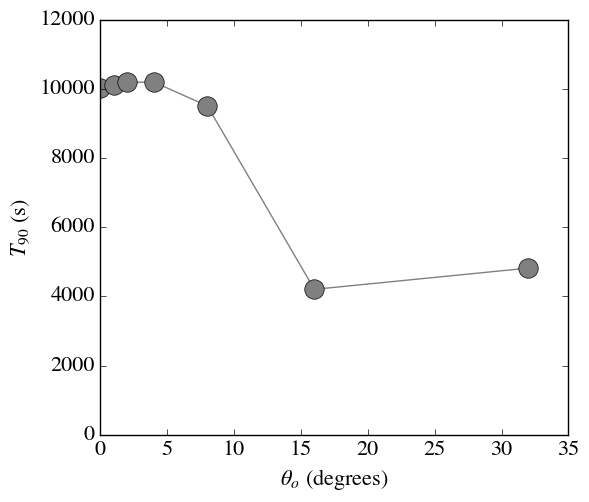

In [14]:

tmax=t0.max()+989
jj=n.argsort(n.abs(tmax-tm))

tbase=n.concatenate([t0+989,tm[jj[0]:]])
ll0=n.concatenate([l0,liso2[jj[0]:]*l0[-1]/liso2[jj[0]]])
ll1=n.concatenate([l1,liso2[jj[0]:]*l1[-1]/liso2[jj[0]]])
ll2=n.concatenate([l2,liso2[jj[0]:]*l2[-1]/liso2[jj[0]]])
ll4=n.concatenate([l4,liso2[jj[0]:]*l4[-1]/liso2[jj[0]]])
ll8=n.concatenate([l8,liso2[jj[0]:]*l8[-1]/liso2[jj[0]]])
ll16=n.concatenate([l16,liso2[jj[0]:]*l16[-1]/liso2[jj[0]]])
ll32=n.concatenate([l32,liso2[jj[0]:]*l32[-1]/liso2[jj[0]]])

t90=n.zeros(7)
grow=n.zeros(tbase.size)
for i in range(grow.size):
	grow[i]=n.trapz(ll0[:i],x=tbase[:i])
grow=grow/grow.max()
tstart=n.interp(0.05,grow,tbase)
tend=n.interp(0.95,grow,tbase)
t90[0]=tend-tstart

grow=n.zeros(tbase.size)
for i in range(grow.size):
	grow[i]=n.trapz(ll1[:i],x=tbase[:i])
grow=grow/grow.max()
tstart=n.interp(0.05,grow,tbase)
tend=n.interp(0.95,grow,tbase)
t90[1]=tend-tstart

grow=n.zeros(tbase.size)
for i in range(grow.size):
	grow[i]=n.trapz(ll2[:i],x=tbase[:i])
grow=grow/grow.max()
tstart=n.interp(0.05,grow,tbase)
tend=n.interp(0.95,grow,tbase)
t90[2]=tend-tstart

grow=n.zeros(tbase.size)
for i in range(grow.size):
	grow[i]=n.trapz(ll4[:i],x=tbase[:i])
grow=grow/grow.max()
tstart=n.interp(0.05,grow,tbase)
tend=n.interp(0.95,grow,tbase)
t90[3]=tend-tstart

grow=n.zeros(tbase.size)
for i in range(grow.size):
	grow[i]=n.trapz(ll8[:i],x=tbase[:i])
grow=grow/grow.max()
tstart=n.interp(0.05,grow,tbase)
tend=n.interp(0.95,grow,tbase)
t90[4]=tend-tstart

grow=n.zeros(tbase.size)
for i in range(grow.size):
	grow[i]=n.trapz(ll16[:i],x=tbase[:i])
grow=grow/grow.max()
tstart=n.interp(0.05,grow,tbase)
tend=n.interp(0.95,grow,tbase)
t90[5]=tend-tstart

grow=n.zeros(tbase.size)
for i in range(grow.size):
	grow[i]=n.trapz(ll32[:i],x=tbase[:i])
grow=grow/grow.max()
tstart=n.interp(0.05,grow,tbase)
tend=n.interp(0.95,grow,tbase)
t90[6]=tend-tstart

thes=n.array([0,1.,2,4,8,16,32])
p.figure()
#p.clf()
p.axes([.18,.13,.78,.83])
p.plot(thes,t90,marker='o',ls='-',ms=14,color='grey') # COLORS[2])
p.axis([0,35,0,12000])

p.xlabel(r'$\theta_o$ (degrees)')
p.ylabel(r'$T_{90}$ (s)')
p.savefig('T90.pdf')
p.show()

